In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mv "/content/drive/MyDrive/train" "/content/data"

mv: cannot stat '/content/drive/MyDrive/train': No such file or directory


In [ ]:
!unzip '/content/drive/MyDrive/ECE595/train_small.zip' -d '/content/data'
!unzip '/content/drive/MyDrive/ECE595/test.zip' -d '/content/data'
!unzip '/content/drive/MyDrive/ECE595/ece595ml-s2022.zip' -d '/content/data'

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/__MACOSX/test/._2426.jpg  
  inflating: /content/data/test/3738.jpg  
  inflating: /content/data/__MACOSX/test/._3738.jpg  
  inflating: /content/data/test/4057.jpg  
  inflating: /content/data/__MACOSX/test/._4057.jpg  
  inflating: /content/data/test/1649.jpg  
  inflating: /content/data/__MACOSX/test/._1649.jpg  
  inflating: /content/data/test/1891.jpg  
  inflating: /content/data/__MACOSX/test/._1891.jpg  
  inflating: /content/data/test/4731.jpg  
  inflating: /content/data/__MACOSX/test/._4731.jpg  
  inflating: /content/data/test/2340.jpg  
  inflating: /content/data/__MACOSX/test/._2340.jpg  
  inflating: /content/data/test/4725.jpg  
  inflating: /content/data/__MACOSX/test/._4725.jpg  
  inflating: /content/data/test/2354.jpg  
  inflating: /content/data/__MACOSX/test/._2354.jpg  
  inflating: /content/data/test/1885.jpg  
  inflating: /content/data/__MACOSX/test/._1885.jpg  
  inflating: /content/

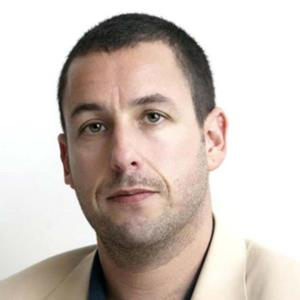

JPEG
RGB
(300, 300, 3)


In [ ]:
from PIL import Image
import numpy as np
img = Image.open('/content/data/train_small/1.jpg')
display(img)

print(img.format)
print(img.mode)
print(np.asarray(img).shape)

In [ ]:
import pandas as pd
import cv2
train = pd.read_csv('/content/data/train_small.csv')
imgl = train[:]['File Name']
image_names = list(imgl[:5910])
image = cv2.imread(f"/content/data/train_small/{image_names[10]}")
print(imgl)

0          0.jpg
1          1.jpg
2          2.jpg
3          3.jpg
4          4.jpg
          ...   
6950    6950.jpg
6951    6951.jpg
6952    6952.jpg
6953    6953.jpg
6954    6954.jpg
Name: File Name, Length: 6955, dtype: object


In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(train[["Category"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

,Aaron Judge,Aaron Paul,Aaron Taylor-Johnson,Abigail Breslin,Adam Sandler,Adele,Adriana Barraza,Adriana Lima,Adrianne Palicki,Adrien Brody,...,Beyonce Knowles,Bill Daley,Bill Hader,Bill Murray,Bill O Reilly,Bill Paxton,Bill Pullman,Bill Rancic,Billy Bob Thornton,bella thorne
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
oe_results.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
classes = oe_style.categories_
classes = np.asarray(classes)
classs = classes.T

In [ ]:
import torch
from torch.utils.data.dataset import Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd
import cv2
import numpy as np
import torch
from torchvision import datasets, transforms as T
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, csv, train, test):
        self.csv = csv
        self.train = train
        self.test = test
        self.all_image_names = self.csv[:]['File Name']
        self.all_labels = oe_results.toarray()
        self.train_ratio = int(0.85 * len(self.csv))
        self.valid_ratio = len(self.csv) - self.train_ratio
        # set the training data images and labels
        if self.train == True:
            print(f"Number of training images: {self.train_ratio}")
            self.image_names = list(self.all_image_names[:self.train_ratio])
            self.labels = list(self.all_labels[:self.train_ratio])
            # define the training transforms
            self.transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((224, 224)),
                transforms.RandomHorizontalFlip(p=0.5),
                transforms.RandomRotation(degrees=45),
                transforms.ToTensor(),
            ])
        # set the validation data images and labels
        elif self.train == False and self.test == False:
            print(f"Number of validation images: {self.valid_ratio}")
            self.image_names = list(self.all_image_names[-self.valid_ratio:-10])
            self.labels = list(self.all_labels[-self.valid_ratio:])
            # define the validation transforms
            self.transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
            ])
        # set the test data images and labels, only last 10 images
        # this, we will use in a separate inference script
        elif self.test == True and self.train == False:
            self.image_names = list(self.all_image_names[-10:])
            self.labels = list(self.all_labels[-10:])
             # define the test transforms
            self.transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.ToTensor(),
            ])
    def __len__(self):
        return len(self.image_names)
    
    def __getitem__(self, index):        
        image = cv2.imread(f"/content/data/train_small/{self.image_names['File Name'][index]}")
        print(image.shape)
        # convert the image from BGR to RGB color format
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # apply image transforms
        image = self.transform(image)
        targets = self.labels['Category'][index]
        
        return {
            'image': torch.tensor(image, dtype=torch.float32),
            'label': torch.tensor(targets, dtype=torch.float32)
        }

In [ ]:
from torchvision import models as models
import torch.nn as nn

def model(pretrained, requires_grad):
    model = models.resnet50(progress=True, pretrained=pretrained)
    # to freeze the hidden layers
    if requires_grad == False:
        for param in model.parameters():
            param.requires_grad = False
    # to train the hidden layers
    elif requires_grad == True:
        for param in model.parameters():
            param.requires_grad = True
    # make the classification layer learnable
    # we have 100 classes in total
    model.fc = nn.Linear(2048, 100)
    return model

In [ ]:
from tqdm import tqdm
# training function
def train(model, dataloader, optimizer, criterion, train_data, device):
    print('Training')
    model.train()
    counter = 0
    train_running_loss = 0.0
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
        counter += 1
        data, target = data['image'].to(device), data['label'].to(device)
        optimizer.zero_grad()
        outputs = model(data)
        # apply sigmoid activation to get all the outputs between 0 and 1
        outputs = torch.sigmoid(outputs)
        loss = criterion(outputs, target)
        train_running_loss += loss.item()
        # backpropagation
        loss.backward()
        # update optimizer parameters
        optimizer.step()
        
    train_loss = train_running_loss / counter
    return train_loss

In [ ]:
# validation function
def validate(model, dataloader, criterion, val_data, device):
    print('Validating')
    model.eval()
    counter = 0
    val_running_loss = 0.0
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(val_data)/dataloader.batch_size)):
            counter += 1
            data, target = data['image'].to(device), data['label'].to(device)
            outputs = model(data)
            # apply sigmoid activation to get all the outputs between 0 and 1
            outputs = torch.sigmoid(outputs)
            loss = criterion(outputs, target)
            val_running_loss += loss.item()
        
        val_loss = val_running_loss / counter
        return val_loss

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
# initialize the computation device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#intialize the model
model = model(pretrained=True, requires_grad=False).to(device)
# learning parameters
lr = 0.001
epochs = 20
batch_size = 32
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss()

In [ ]:
# read the training csv file
train_csv = pd.read_csv('/content/data/train_small.csv')
# train dataset
train_data = ImageDataset(
    train_csv, train=True, test=False
)
# validation dataset
valid_data = ImageDataset(
    train_csv, train=False, test=False
)
# train data loader
train_loader = DataLoader(
    train_data, 
    batch_size=batch_size,
    shuffle=True
)
# validation data loader
valid_loader = DataLoader(
    valid_data, 
    batch_size=batch_size,
    shuffle=False
)

Number of training images: 5911
Number of validation images: 1044


In [ ]:
train_loss = []
valid_loss = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model, train_loader, optimizer, criterion, train_data, device
    )
    valid_epoch_loss = validate(
        model, valid_loader, criterion, valid_data, device
    )
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
    print(f'Val Loss: {valid_epoch_loss:.4f}')

Epoch 1 of 20
Training


  0%|          | 0/184 [00:00<?, ?it/s]


TypeError: ignored

In [ ]:
# trainset = mydata(csv_path='/content/data/train_small.csv', transforms=transform)
# train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=0)

dataiter = iter(train_loader) 
images, labels = dataiter.next()

fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range(3):
  for j in range(3):
    img = images[i*3+j]/2+0.5
    img = img.numpy()
    img = img.swapaxes(0,1).swapaxes(1,2)
    ax[i,j].imshow(img)
    ax[i,j].set_title(f'{classs[labels[i*3+j]]}')
fig.show()

TypeError: ignored

In [ ]:
import torchvision.models as models
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
device = torch.device('cpu')
import torch.optim as optim
import torch.nn as nn

# for param in model.parameters():
#     param.requires_grad = False
    
model.fc = nn.Linear(512, 100)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum=0.9,weight_decay=5e-4)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
num_epochs = 2
n_total_step = len(train_loader)
#print(n_total_step)

for epoch in range(num_epochs):
  for i, (imgs , labels) in enumerate(train_loader):
    imgs = imgs.to(device)
    labels = labels.to(device)
    labels_hat = model(imgs)
    n_corrects = (labels_hat.argmax(axis=1)==labels).sum().item()
    loss_value = criterion(labels_hat, labels)
    loss_value.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i+1) % 250 == 0:
      print(f' epoch {epoch+1}/{num_epochs}, step: {i+1}/{n_total_step}: loss = {loss_value:.5f}, acc = {100*(n_corrects/labels.size(0)):.2f}% ')
  print()

# with torch.no_grad():
#     number_corrects = 0
#     number_samples = 0
#     for i, (test_images_set , test_labels_set) in enumerate(test_loader):
#         test_images_set = test_images_set.to(device)
#         test_labels_set = test_labels_set.to(device)
    
#         y_predicted = model(test_images_set)
#         labels_predicted = y_predicted.argmax(axis = 1)
#         number_corrects += (labels_predicted==test_labels_set).sum().item()
#         number_samples += test_labels_set.size(0)
#     print(f'Overall accuracy {(number_corrects / number_samples)*100}%')

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


KeyboardInterrupt: ignored

In [ ]:
import keras
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
train = pd.read_csv('/content/data/train_small.csv')

In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/data/train_small/'+train['File Name'][i], target_size=(32,32,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

 12%|█▏        | 837/6955 [00:14<01:11, 85.89it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 6955/6955 [01:52<00:00, 61.96it/s]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
y = oe_style.fit_transform(train[["Category"]])
pd.DataFrame(y.toarray(), columns=oe_style.categories_).head()

,Aaron Judge,Aaron Paul,Aaron Taylor-Johnson,Abigail Breslin,Adam Sandler,Adele,Adriana Barraza,Adriana Lima,Adrianne Palicki,Adrien Brody,...,Beyonce Knowles,Bill Daley,Bill Hader,Bill Murray,Bill O Reilly,Bill Paxton,Bill Pullman,Bill Rancic,Billy Bob Thornton,bella thorne
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
classes = oe_style.categories_
classes = np.asarray(classes)
classs = classes.T
classs[30]

array(['Amanda Peet'], dtype=object)

In [ ]:
y = y.todense()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5564, 32, 32, 3), (1391, 32, 32, 3), (5564, 100), (1391, 100))

In [ ]:
model = Sequential()
input_shape= (32,32,3)
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         # layers.Dropout(0.5),
#         layers.Dense(100, activation="softmax"),
#     ]
# )

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
174/174 [==============================] - 7s 29ms/step - loss: 5.2716 - accuracy: 0.0093 - val_loss: 4.9474 - val_accuracy: 0.0072
Epoch 2/30
174/174 [==============================] - 4s 25ms/step - loss: 4.8074 - accuracy: 0.0257 - val_loss: 4.7236 - val_accuracy: 0.0216
Epoch 3/30
174/174 [==============================] - 4s 25ms/step - loss: 4.5297 - accuracy: 0.0444 - val_loss: 4.5782 - val_accuracy: 0.0352
Epoch 4/30
174/174 [==============================] - 4s 25ms/step - loss: 4.1819 - accuracy: 0.0841 - val_loss: 4.4985 - val_accuracy: 0.0590
Epoch 5/30
174/174 [==============================] - 4s 25ms/step - loss: 3.8271 - accuracy: 0.1310 - val_loss: 4.5121 - val_accuracy: 0.0676
Epoch 6/30
174/174 [==============================] - 5s 26ms/step - loss: 3.3869 - accuracy: 0.2205 - val_loss: 4.4914 - val_accuracy: 0.0705
Epoch 7/30
174/174 [==============================] - 4s 25ms/step - loss: 2.9365 - accuracy: 0.3167 - val_loss: 4.4923 - val_accuracy: 0.0683

In [ ]:
test1 = pd.read_csv('/content/data/sample_submission.csv')

In [ ]:
test_image = []
for i in tqdm(range(test1.shape[0])):
    img = image.load_img('/content/data/test/'+test1['Id'][i].astype('str')+'.jpg', target_size=(32,32,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

  2%|▏         | 89/4977 [00:01<01:21, 59.62it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 4977/4977 [01:12<00:00, 68.63it/s]


In [ ]:
predict_x=model.predict(test) 
prediction=np.argmax(predict_x,axis=1)

In [ ]:
cls = []
print(prediction.shape)
print(len(prediction))
print(classs[99])
for i in range(len(prediction)):
  pred =prediction[i]
  cl = classs[pred]
  cls.append(cl)

cls = np.asarray(cls)
print(cls.shape)

(4977,)
4977
['bella thorne']
(4977, 1)


In [ ]:
test1['Category'] = cls
test1.to_csv('sample_cnn.csv', header=True, index=False)